# Capstone 2
## Data Processing and Statistical Analysis

### Importing Libraries

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import CSV File

In [480]:
data = pd.read_csv('NSMES1988-NSMES1988.csv')
df = pd.DataFrame(data)

### Data Analysis and visualization

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4406 non-null   int64  
 1   visits      4406 non-null   int64  
 2   nvisits     4406 non-null   int64  
 3   ovisits     4406 non-null   int64  
 4   novisits    4406 non-null   int64  
 5   emergency   4406 non-null   int64  
 6   hospital    4406 non-null   int64  
 7   health      4406 non-null   object 
 8   chronic     4406 non-null   int64  
 9   adl         4406 non-null   object 
 10  region      4406 non-null   object 
 11  age         4406 non-null   float64
 12  gender      4406 non-null   object 
 13  married     4406 non-null   object 
 14  school      4406 non-null   int64  
 15  income      4406 non-null   float64
 16  employed    4406 non-null   object 
 17  insurance   4406 non-null   object 
 18  medicaid    4406 non-null   object 
dtypes: float64(2), int64(9), ob

In [482]:
df.head()

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no


### Dropping Unnecessary Columns
Dropping Unnamed column as it is an unnecessary column existing in this dataset - most probably used as a n(userid) but we can just follow through with indexes

In [483]:
df = df.drop(columns=["Unnamed: 0"])

### Changing data types for things that could be looked at properly

In [484]:
# Correct the scaled ages
df['age'] = (df['age'] * 10).round().astype('int64')

# Filter for younger individuals (under 18 years old)
young_df = df[df['age'] < 18]
df['income'] = df['income'] * 10000 
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69,male,yes,6,28810.0,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,74,female,yes,10,27478.0,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,66,female,no,10,6532.0,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,76,male,yes,3,6588.0,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,79,female,yes,6,6588.0,no,yes,no


### Age
The moment I saw age I was instantly interested to see the frequence of the age in this data
Looking at the Age I was also interested to see the male and female ratio.

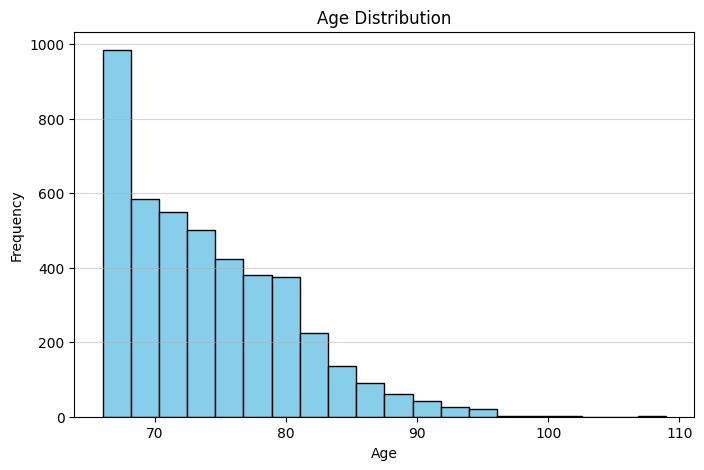

In [485]:
plt.figure(figsize=(8,5))
plt.hist(
    df['age'], 
    bins=20, 
    color='skyblue', 
    edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()


### Male Female Ratio in terms of age
This really shows there's more females in this list than male, with an interesting trend towards the end.

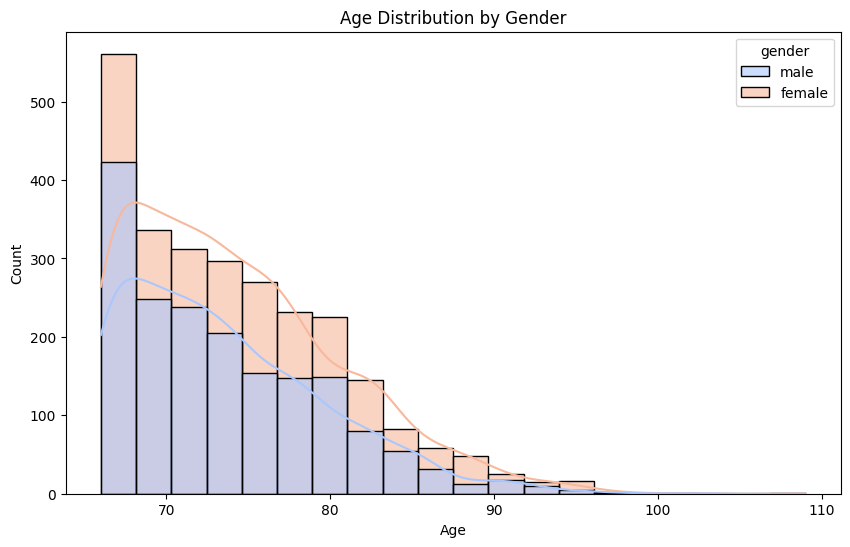

In [486]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df, 
    x='age', 
    hue='gender', 
    kde=True, 
    bins=20, 
    palette='coolwarm', 
    alpha=0.6)

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Age by Region and Gender
One thing after noticing the trend in so many females I was curious to see if there were more females in one region than the other.
Noticing the green areas I assume they are overlaps which means males and females int hat region have similar age distribution.


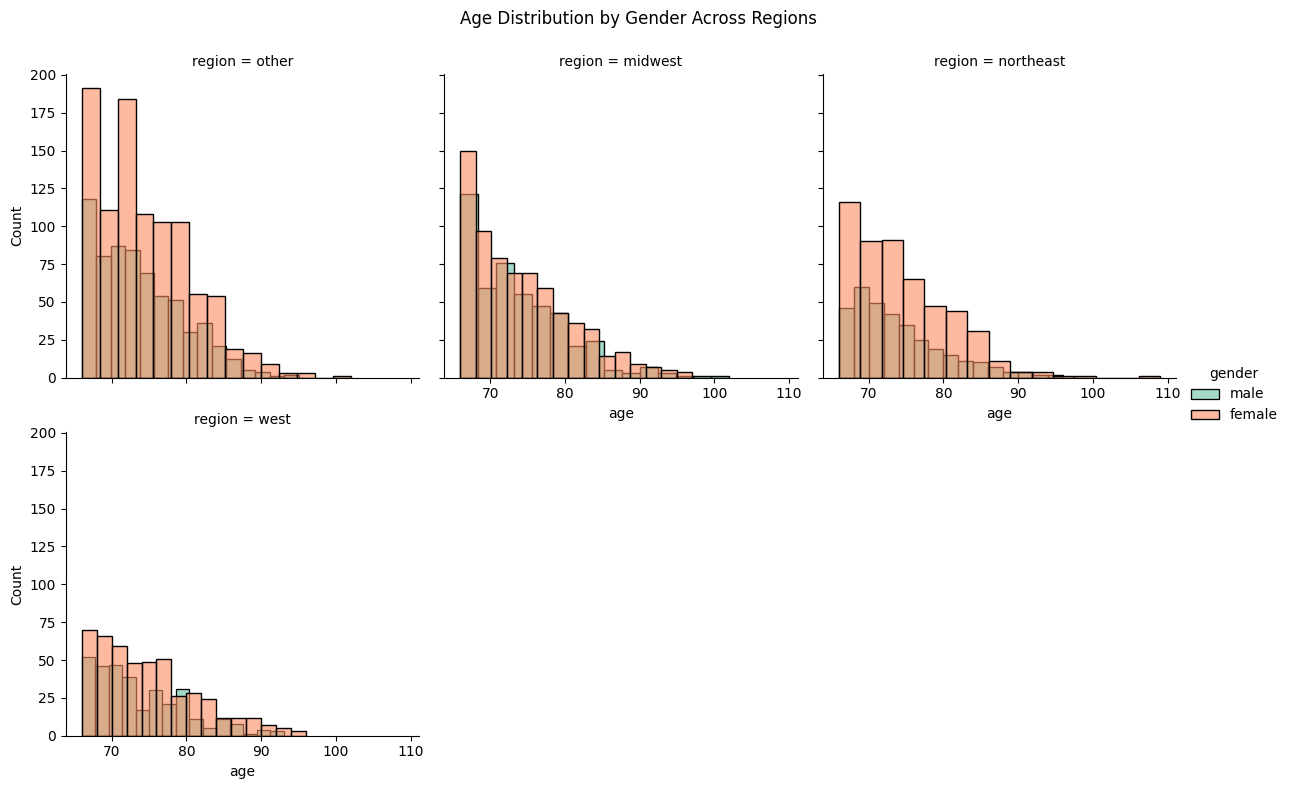

In [487]:
g = sns.FacetGrid(
    df, 
    col='region', 
    hue='gender', 
    col_wrap=3, 
    height=4, 
    palette='Set2')

g.map(
    sns.histplot, 
    'age', 
    bins=15, 
    alpha=0.6)

g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Gender Across Regions')
plt.show()


### Average Income by Region
I was curious to see the income difference in the different regions. Seems like West was the wealthy spot.

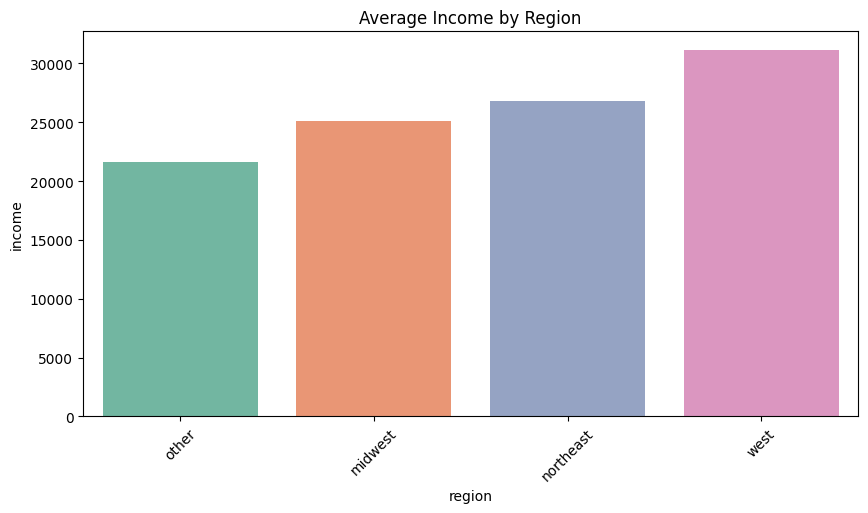

In [488]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='region',
    y='income',
    hue='region',
    data=df,
    palette='Set2',
    estimator=np.mean,
    errorbar=None)

plt.title('Average Income by Region')
plt.xticks(rotation=45)
plt.show()


### Income Age by Gender
I was going through the income scatter plot and comparing it with gender as I wanted to know the medium of it.
The only problem was because the top 1% was so spaced out the scatter plot almost looked useless.
So I thought maybe i can cut it down and focus on the majority and see where the mediun really is because that 1% is just useless differential.
I also noticed the average income of both of them through the regression line

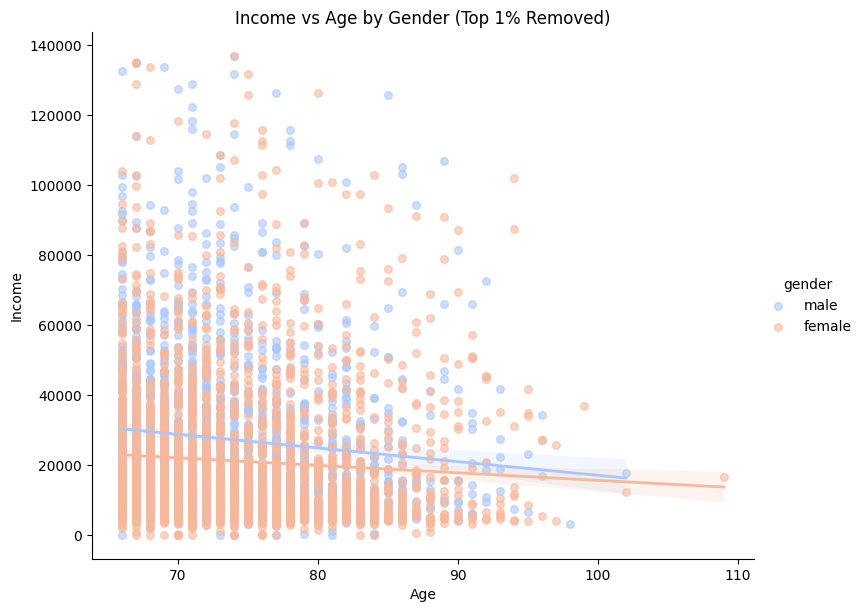

In [489]:
df['income'] = df['income'].apply(lambda x: x if x >= 0 else np.nan) #Replace missing income

df['income_log'] = np.log1p(df['income'].fillna(0))

q991 = df['income'].quantile(0.991)
df_filtered = df[df['income'] <= q991]

sns.lmplot(
    data=df_filtered, 
    x='age', 
    y='income', 
    hue='gender',
    palette='coolwarm', 
    height=6, 
    aspect=1.3,
    scatter_kws={'alpha':0.6, 's':30},
    line_kws={'lw':2}
)

plt.title('Income vs Age by Gender (Top 1% Removed)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


### Confirm that more males get paid higher than women
I decided to create a bar plot to check. And before I get judged it's not that deep I was genuinely curious on the difference.

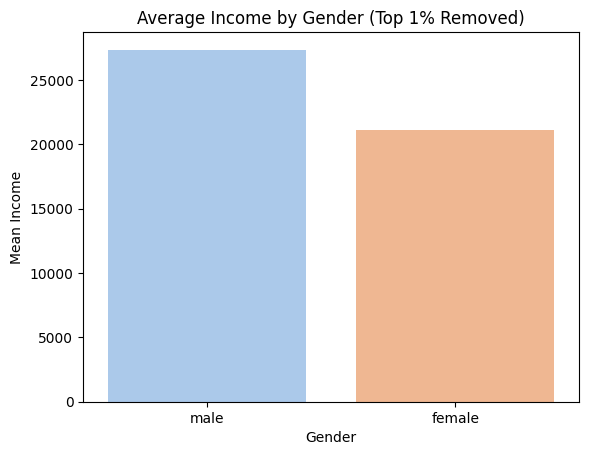

In [490]:
sns.barplot(
    data=df_filtered,
    x='gender', y='income',
    hue='gender', legend=False,
    palette='pastel',
    estimator='mean',
    errorbar=None
)
plt.title('Average Income by Gender (Top 1% Removed)')
plt.xlabel('Gender')
plt.ylabel('Mean Income')
plt.show()


### Incomve Vs Education
I was very much interested if there education had any effect on their salary.


__INTERESTINGLY : Education helped women to get more money.__

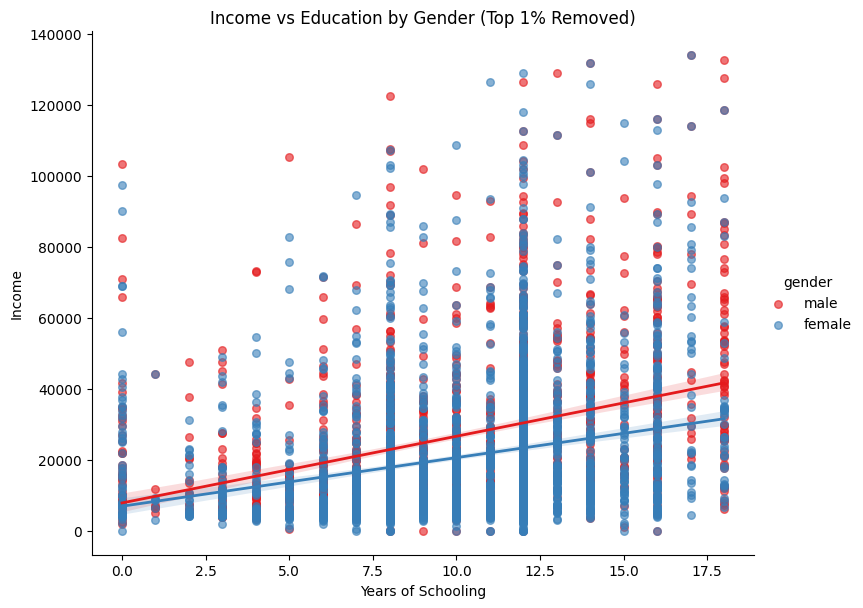

In [491]:
q99 = df['income'].quantile(0.99)
df_filtered = df[df['income'] <= q99]

sns.lmplot(
    data=df_filtered,
    x='school', y='income',
    hue='gender',
    palette='Set1',
    height=6, aspect=1.3,
    scatter_kws={'alpha': 0.6, 's': 30},
    line_kws={'lw': 2}
)

plt.title('Income vs Education by Gender (Top 1% Removed)')
plt.xlabel('Years of Schooling')
plt.ylabel('Income')
plt.show()


### How is everyone?
I was curious to see how everyone was doing as a whole and it seems less people were excelent and most people were average.
This can really go deeper.

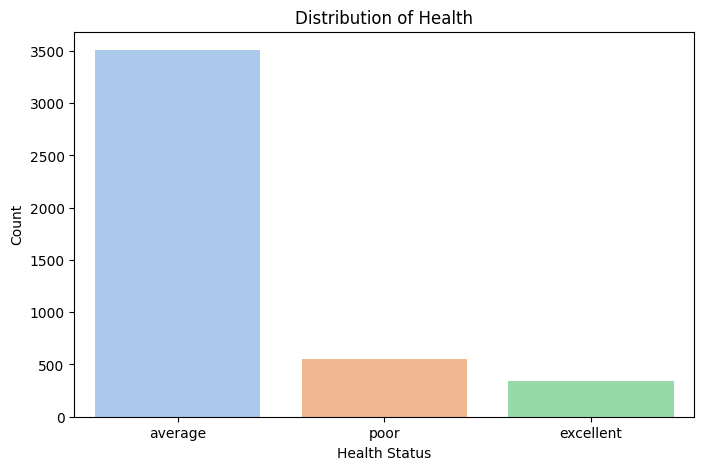

In [492]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='health',
    hue='health',
    legend=False,
    data=df,
    palette='pastel'
)

plt.title('Distribution of Health')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()


### save dataframe

In [493]:
df.to_csv('NSMES1988updated.csv', index=False)
df.describe()


,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,income_log
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4403.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024058,10.290286,25294.996134,9.705489
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29242.354541,1.105758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9131.500000,9.118499
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16986.000000,9.739939
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31745.000000,10.365002
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000,13.214673


### Woah what are these numbers??????????
I did not see that coming. I am so confused. While working on it I understood that there was some changes happening especially when I would run one cell multiple times things would be changing which was confusing. There's changes to almost everything. Or am I calling the wrong dataframe???

### Concluding Thoughts

I am actually too shocked to write a summary. What actually happened to the dataframe I was working on? Or did I call the wrong dataframe? I could go back and check and figure it out but this just makes jupyter notebooks so confusing. I was starting to like this for a hot moment. 

## Summary
I honestly didn’t expect this dataset to take me down so many different paths. I started with just a basic idea of cleaning it up, but soon realized there were scaled and encoded values hiding in plain sight. The `age` column, for example, had to be corrected because it was scaled down by 10, and `income` needed to be multiplied to reflect real values. I also dropped the unnecessary `Unnamed: 0` column that was just acting as an index. Once the data started looking cleaner, I began exploring. First with age distribution, then the male to female ratio, and even regional differences. That’s when I noticed that there were far more females overall and that the West region seemed to be wealthier on average.

When I visualized income vs. age using a regression plot, the pattern didn’t make much sense at first because the top 1% of values completely threw off the scale. So I trimmed the outliers and focused on the bigger picture, where most people actually were, not the extremes. That small change made the whole plot so much clearer. From there, I compared income by gender and also by education level, and interestingly, women’s income seemed to benefit more from education. I even looked into general health distribution, and most people reported being average rather than excellent. 

Overall, this project really showed me how important it is to pay attention to data types and scaling early on. The small things like cleaning, transforming, or even removing extreme values can completely change how you see trends. It wasn’t just about crunching numbers but learning how to uncover a story that actually makes sense. I could definitely go deeper with this because there are still more anomalies in the dataset that would need correction, but honestly, this was a really fun assignment to work on at the end of the day.
